In [2]:
from typing import Annotated, Literal, TypedDict

from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

In [3]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [31]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [32]:
search("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [33]:
search("what is a weather in india?")

"It's 90 degrees and sunny."

In [35]:
tools=[search]

In [36]:
tools

[StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001A1337D5D80>)]

In [37]:
tool_node=ToolNode(tools)

In [40]:
tool_node

tools(tags=None, recurse=True, func_accepts_config=True, func_accepts={'writer': False, 'store': False}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001A1337D5D80>)}, handle_tool_errors=True)

In [41]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001A1338596F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001A13385A3B0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [47]:
llm_with_tool=llm.bind_tools(tools)

In [48]:
llm_with_tool.invoke("hi")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_djrk', 'function': {'arguments': '{"query":"hi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 937, 'total_tokens': 1017, 'completion_time': 0.145454545, 'prompt_time': 0.03038473, 'queue_time': 0.004178960000000002, 'total_time': 0.175839275}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7e10602d-48cc-4688-979f-a28dbf1a6678-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi'}, 'id': 'call_djrk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 937, 'output_tokens': 80, 'total_tokens': 1017})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cszj', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 943, 'total_tokens': 1025, 'completion_time': 0.149090909, 'prompt_time': 0.030106042, 'queue_time': 0.003872157000000001, 'total_time': 0.179196951}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fa683e35-799f-4498-8cb4-6b63d97d7a33-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_cszj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 943, 'output_tokens': 82, 'total_tokens': 1025})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_sg9d', 'function': {'arguments': '{"query":"hi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 937, 'total_tokens': 1017, 'completion_time': 0.150551835, 'prompt_time': 0.042811728, 'queue_time': 0.004417227000000003, 'total_time': 0.193363563}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-cbdac5e2-5354-496c-b5ef-5d5e4faf125b-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi'}, 'id': 'call_sg9d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 937, 'output_tokens': 80, 'total_tokens': 1017})

In [96]:
def call_model(state: MessagesState):
    messages = state['messages']
    print(f"ye mera message hai {messages}")
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [83]:
def should_continue(state: MessagesState) -> Literal["tools", END]:
    print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END


In [68]:
response = llm_with_tool.invoke("hi how are you?")
state={"messages": [response]}

In [77]:
state={"messages": [response]}

In [78]:
messages = state['messages']

In [81]:
messages[-1]

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tb47', 'function': {'arguments': '{"query":"temperature in india"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 945, 'total_tokens': 1027, 'completion_time': 0.149090909, 'prompt_time': 0.030172069, 'queue_time': 0.004229676999999998, 'total_time': 0.179262978}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-db9a3e83-6040-4711-a1cb-3a1e735232bf-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in india'}, 'id': 'call_tb47', 'type': 'tool_call'}], usage_metadata={'input_tokens': 945, 'output_tokens': 82, 'total_tokens': 1027})

In [70]:
response = llm_with_tool.invoke("what is a temprature in india?")
state={"messages": [response]}

In [71]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'temperature in india'},
  'id': 'call_tb47',
  'type': 'tool_call'}]

In [72]:
state

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tb47', 'function': {'arguments': '{"query":"temperature in india"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 945, 'total_tokens': 1027, 'completion_time': 0.149090909, 'prompt_time': 0.030172069, 'queue_time': 0.004229676999999998, 'total_time': 0.179262978}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-db9a3e83-6040-4711-a1cb-3a1e735232bf-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in india'}, 'id': 'call_tb47', 'type': 'tool_call'}], usage_metadata={'input_tokens': 945, 'output_tokens': 82, 'total_tokens': 1027})]}

In [73]:
should_continue(state)

here is a state from should continue {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tb47', 'function': {'arguments': '{"query":"temperature in india"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 945, 'total_tokens': 1027, 'completion_time': 0.149090909, 'prompt_time': 0.030172069, 'queue_time': 0.004229676999999998, 'total_time': 0.179262978}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-db9a3e83-6040-4711-a1cb-3a1e735232bf-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in india'}, 'id': 'call_tb47', 'type': 'tool_call'}], usage_metadata={'input_tokens': 945, 'output_tokens': 82, 'total_tokens': 1027})]}
here is a last message from should continue content='' additional_kwargs={'tool_calls': [{'id': 'call_tb47', 'function': {'arguments': '{"query":"temperature in india"}', 'na

'tools'

In [20]:
print(MessagesState)

<class 'langgraph.graph.message.MessagesState'>


In [84]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",should_continue,{"tools": "tools", END: END})

app = workflow.compile()

In [85]:
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

In [86]:
workflow.add_edge(START, "agent")

In [87]:
workflow.add_conditional_edges("agent",should_continue,{"tools": "tools", END: END})

In [99]:
app = workflow.compile()

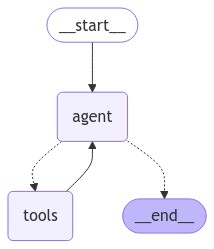

In [100]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [93]:
state=app.invoke({"messages": ["what is the weather in sf"]})

here is a state from should continue {'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='d01a5297-c72e-4338-88cf-9504d8df59be'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q75j', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.030043498, 'queue_time': 0.004041646999999999, 'total_time': 0.179134407}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1e31b3b7-1b00-4301-8713-186652ac6b16-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_q75j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024})]}
here is a last message from should continue conten

In [94]:
state

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='d01a5297-c72e-4338-88cf-9504d8df59be'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q75j', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.030043498, 'queue_time': 0.004041646999999999, 'total_time': 0.179134407}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1e31b3b7-1b00-4301-8713-186652ac6b16-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_q75j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='3d9b0d28-ece1-4

In [91]:
app.invoke({"messages": ["hi how are you?"]})

here is a state from should continue {'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='f20637a2-0bd7-47b9-b45b-29f0fcc94cac'), AIMessage(content='I am doing well, thank you. How can I help you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 941, 'total_tokens': 957, 'completion_time': 0.029090909, 'prompt_time': 0.042254551, 'queue_time': 0.0038062779999999963, 'total_time': 0.07134546}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a1b1af6d-c7f1-48e6-95d0-71707a146a4c-0', usage_metadata={'input_tokens': 941, 'output_tokens': 16, 'total_tokens': 957})]}
here is a last message from should continue content='I am doing well, thank you. How can I help you?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 941, 'total_tokens': 957, 'completion_time': 0.029090909, '

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='f20637a2-0bd7-47b9-b45b-29f0fcc94cac'),
  AIMessage(content='I am doing well, thank you. How can I help you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 941, 'total_tokens': 957, 'completion_time': 0.029090909, 'prompt_time': 0.042254551, 'queue_time': 0.0038062779999999963, 'total_time': 0.07134546}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a1b1af6d-c7f1-48e6-95d0-71707a146a4c-0', usage_metadata={'input_tokens': 941, 'output_tokens': 16, 'total_tokens': 957})]}

In [97]:
call_model(state)

ye mera message hai [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='d01a5297-c72e-4338-88cf-9504d8df59be'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q75j', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.030043498, 'queue_time': 0.004041646999999999, 'total_time': 0.179134407}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1e31b3b7-1b00-4301-8713-186652ac6b16-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_q75j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024}), ToolMessage(content="It's 60 degrees and foggy.", name='search', id='3d9b0d28-ece

{'messages': [AIMessage(content="It's 60 degrees and foggy. \n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 1024, 'total_tokens': 1038, 'completion_time': 0.025454545, 'prompt_time': 0.034757272, 'queue_time': 0.052104007, 'total_time': 0.060211817}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-42695c87-a017-4665-8d43-6152531d9fbf-0', usage_metadata={'input_tokens': 1024, 'output_tokens': 14, 'total_tokens': 1038})]}

In [98]:
workflow.add_edge("tools", 'agent')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [102]:
for output in app.stream(state):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is a state from should continue {'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='d01a5297-c72e-4338-88cf-9504d8df59be'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q75j', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 942, 'total_tokens': 1024, 'completion_time': 0.149090909, 'prompt_time': 0.030043498, 'queue_time': 0.004041646999999999, 'total_time': 0.179134407}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1e31b3b7-1b00-4301-8713-186652ac6b16-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_q75j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 82, 'total_tokens': 1024}), ToolMessage(content="It's 60 degrees and foggy.", n

# now the next step

In [103]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [112]:
tool_node = ToolNode(tools=[tool])

In [104]:
updated_llm=llm.bind_tools(tools)

In [106]:
updated_llm.invoke("hi")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8ypz', 'function': {'arguments': '{"query":"how are you"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 982, 'total_tokens': 1069, 'completion_time': 0.158181818, 'prompt_time': 0.031936806, 'queue_time': 0.004176029000000005, 'total_time': 0.190118624}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-75cbac72-33f7-441f-a468-111b3543c504-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'how are you'}, 'id': 'call_8ypz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 982, 'output_tokens': 87, 'total_tokens': 1069})

In [107]:
updated_llm.invoke("hi how are you?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xk95', 'function': {'arguments': '{"query":"how are you"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 986, 'total_tokens': 1075, 'completion_time': 0.161818182, 'prompt_time': 0.031838497, 'queue_time': 0.0030947929999999985, 'total_time': 0.193656679}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-49f558a0-733f-4723-b717-9e9d24f360cf-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'how are you'}, 'id': 'call_xk95', 'type': 'tool_call'}], usage_metadata={'input_tokens': 986, 'output_tokens': 89, 'total_tokens': 1075})

In [119]:
def call_model(state: MessagesState):
    messages = state['messages']
    print(f"ye mera message hai from tavilay {messages}")
    response = updated_llm.invoke(messages)
    return {"messages": [response]}

In [120]:
def route_tools(
    state:MessagesState ,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

In [121]:
# Define a new graph
workflow2 = StateGraph(MessagesState)

workflow2.add_node("agent", call_model)
workflow2.add_node("tools", tool_node)

workflow2.add_edge(START, "agent")

workflow2.add_conditional_edges("agent",route_tools,{"tools": "tools", END: END})

workflow2.add_edge("tools", 'agent')

app2 = workflow2.compile()



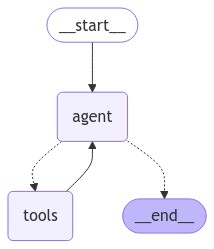

In [122]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [125]:
app2.invoke({"messages":["hi how are you?"]})

ye mera message hai from tavilay [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='e8bda8b3-df60-4e50-b99a-05a64001b85b')]
ye mera message hai from tavilay [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='e8bda8b3-df60-4e50-b99a-05a64001b85b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_36de', 'function': {'arguments': '{"query":"how are you"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 986, 'total_tokens': 1075, 'completion_time': 0.161818182, 'prompt_time': 0.031764485, 'queue_time': 0.003994604999999998, 'total_time': 0.193582667}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-eb811df9-05b2-470f-b23c-708161f897ba-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'how are you'}, 'id'

"I am an AI assistant, so I don't have feelings. But thanks for asking! How are you doing?"

In [126]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [127]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",route_tools,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

app3 = workflow3.compile(checkpointer = memory)

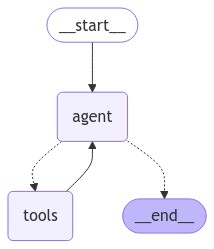

In [128]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [129]:
config = {"configurable": {"thread_id": "1"}}

In [130]:
user_input = "Hi there! My name is Sunny."

In [131]:
events = app3.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
ye mera message hai from tavilay [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='b88cf747-b365-4d01-8eb9-a54d706e69af')]
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_fgt2)
 Call ID: call_fgt2
  Args:
    query: What is Will's name?
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://nameberry.com/b/boy-baby-name-will", "content": "The name Will is a boy's name of English origin meaning \"resolute protector\". Will has definitely replaced Bill, not only as a nickname for William but as a stand-alone name as well, partly thanks to England's Prince William, also known as Wills. Will has a nice old-fashioned, down-home charm, and with recent references such as Will Smith

In [132]:
user_input = "can you tell me what was my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = app3.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
ye mera message hai from tavilay [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='b88cf747-b365-4d01-8eb9-a54d706e69af'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fgt2', 'function': {'arguments': '{"query":"What is Will\'s name?"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 989, 'total_tokens': 1080, 'completion_time': 0.165454545, 'prompt_time': 0.031609625, 'queue_time': 0.003999082000000001, 'total_time': 0.19706417}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-357a4eec-c2b4-4cb7-8313-2bafc9deef14-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "What is Will's name?"}, 'id': 'call_fgt2', 't

In [133]:
config

{'configurable': {'thread_id': '1'}}

In [137]:
app3.checkpointer

In [141]:
memory.get(config)

{'v': 1,
 'ts': '2024-10-27T18:49:31.172606+00:00',
 'id': '1ef94943-37dc-65f3-8008-b29bf6a7734d',
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='b88cf747-b365-4d01-8eb9-a54d706e69af'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fgt2', 'function': {'arguments': '{"query":"What is Will\'s name?"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 989, 'total_tokens': 1080, 'completion_time': 0.165454545, 'prompt_time': 0.031609625, 'queue_time': 0.003999082000000001, 'total_time': 0.19706417}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-357a4eec-c2b4-4cb7-8313-2bafc9deef14-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "What is Will's name?"}, 'id': 'call_fgt2', 'type': 'tool_cal